# PROJECT   CAR PRICE PREDICTION

With the covid 19 impact in the market, we have seen lot of changes in the car market. Now some 
cars are in demand hence making them costly and some are not in demand hence cheaper. One 
of our clients works with small traders, who sell used cars. With the change in market due to covid 
19 impact, our client is facing problems with their previous car price valuation machine learning 
models. So, they are looking for new machine learning models from new data. We have to make 
car price valuation model. This project contains two phaseData Collection Phase
You have to scrape at least 5000 used cars data. You can scrape more data as well, it’s up to you. 
more the data better the model

In this section You need to scrape the data of used cars from websites (Olx, cardekho, Cars24 
etc.) You need web scraping for this. You have to fetch data for different locations. The number of
columns for data doesn’t have limit, it’s up to you and your creativity. Generally, these columns are 
Brand, model, variant, manufacturing year, driven kilometers, fuel, number of owners, location and 
at last target variable Price of the car. This data is to give you a hint about important variables in 
used car model. You can make changes to it, you can add or you can remove some columns, it 
completely depends on the website from which you are fetching the data.
Try to include all types of cars in your data for example- SUV, Sedans, Coupe, minivan, 
Hatchback.

Note – The data which you are collecting is important to us. Kindly don’t share it on any public platforms.
Model Building Phase
After collecting the data, you need to build a machine learning model. Before model building do all 
data pre-processing steps. Try different models with different hyper parameters and select the best 
model.

Follow the complete life cycle of data science. Include all the steps like.
1. Data Cleaning
2. Exploratory Data Analysis
3. Data Pre-processing
4. Model Building
5. Model Evaluation
6. Selecting the best model

# Importing Impotant Libraries

In [1]:
import pandas as pd        # for data manipulation
import numpy as np         # for mathematical calculations
import seaborn as sns      # for data visualization

import matplotlib.pyplot as plt  #for graphical analysis
%matplotlib inline

from scipy.stats import zscore # to remove outliers

from sklearn.preprocessing import StandardScaler  # for normalize the model
from sklearn.preprocessing import LabelEncoder  # to convert object into int


from sklearn.model_selection import train_test_split  # for train and test model

import warnings                      # to ignore any warnings
warnings.filterwarnings("ignore")

from sklearn import metrics  # for model evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, confusion_matrix, classification_report

# Load Dataset

In [2]:
data=pd.read_csv('used_cars.csv')  # read the data
data

,Name,Model,Fuel,Kilometer,Type,Onwer,Price
0,2013 Maruti Ritz,ZXI Manual,Petrol,"14,047 km",Manual,1st,"₹3,83,999"
1,2016 Maruti Baleno,DELTA 1.2 K12 Manual,Petrol,"11,510 km",Manual,2nd,"₹5,06,399"
2,2012 Honda Accord,2.4 MT Manual,Petrol,"50,161 km",Manual,2nd,"₹5,20,199"
3,2019 Maruti Swift,ZXI AMT Automatic,Petrol,"15,445 km",Automatic,2nd,"₹6,73,399"
4,2014 Maruti Wagon R 1.0,LXI Manual,Petrol,"13,900 km",Manual,1st,"₹3,38,799"
...,...,...,...,...,...,...,...
5019,Hyundai I10 (2010),Era,PETROL,42000.0 KM,MANUAL,2nd,"₹ 2,25,000"
5020,Hyundai Elite I20 (2015),Sportz (O) 1.2,PETROL,111000.0 KM,MANUAL,2nd,"₹ 5,99,000"
5021,Bmw 3 Series (2012),320d Luxury Line,DIESEL,85000.0 KM,AUTOMATIC,2nd,"₹ 11,99,000"
5022,Maruti Suzuki Swift Dzire (2015),Vdi BSIV,DIESEL,71000.0 KM,MANUAL,1st,"₹ 4,25,000"


# Dimensions of Dataset

In [3]:
# check the no. of rows & column & finding the count of missing value
print(data.shape)
print("-"*60)
print(data.isna().sum())
#printing the summary of data type
data.info() 

(5024, 7)
------------------------------------------------------------
Name           3
Model         10
Fuel           3
Kilometer      3
Type          35
Onwer          6
Price        456
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5024 entries, 0 to 5023
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Name       5021 non-null   object
 1   Model      5014 non-null   object
 2   Fuel       5021 non-null   object
 3   Kilometer  5021 non-null   object
 4   Type       4989 non-null   object
 5   Onwer      5018 non-null   object
 6   Price      4568 non-null   object
dtypes: object(7)
memory usage: 274.9+ KB


As we see there are null values are present in the dataset & All columns are object type

# Data Visualization

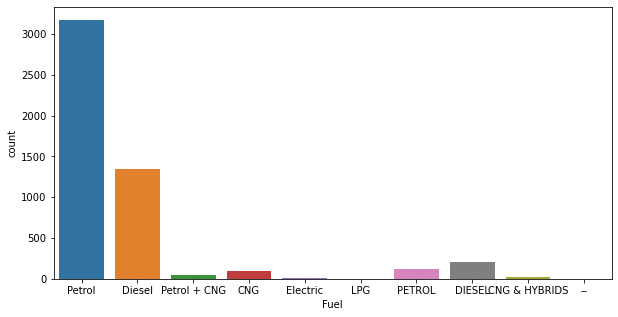

Petrol           3174
Diesel           1341
DIESEL            202
PETROL            121
CNG                98
Petrol + CNG       52
CNG & HYBRIDS      23
Electric            7
--                  2
LPG                 1
Name: Fuel, dtype: int64


In [5]:
#plot each class frequency
plt.figure(figsize=(10,5))
sns.countplot(x='Fuel',data=data)
plt.show()
print(data['Fuel'].value_counts())

From Graph we can see there are maximum used cars fuel type are petrol & least used cars fuel for sold is lpg

Also we see there are some "--" type of fule is present in data set so lets deal with it in preprocessing step.

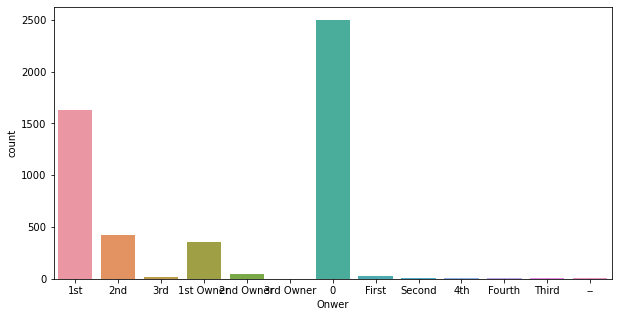

0            2499
1st          1630
2nd           427
1st Owner     352
2nd Owner      44
First          25
3rd            18
Second          7
4th             5
Third           4
--              3
Fourth          3
3rd Owner       1
Name: Onwer, dtype: int64


In [6]:
#plot each class frequency
plt.figure(figsize=(10,5))
sns.countplot(x='Onwer',data=data)
plt.show()
print(data['Onwer'].value_counts())

As we see from graph that we have 0 null values & - unstructured data also so lets deal with it in preproccesing step.

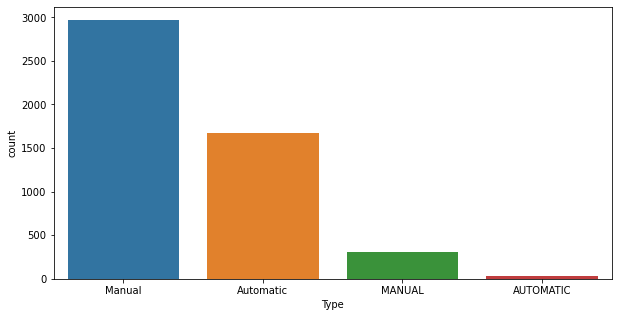

Manual       2970
Automatic    1671
MANUAL        311
AUTOMATIC      37
Name: Type, dtype: int64


In [7]:
#plot each class frequency
plt.figure(figsize=(10,5))
sns.countplot(x='Type',data=data)
plt.show()
print(data['Type'].value_counts())

As we see from graph there are maximum type of used cars for the sale are manualy operated. & spelling mistecks are there.

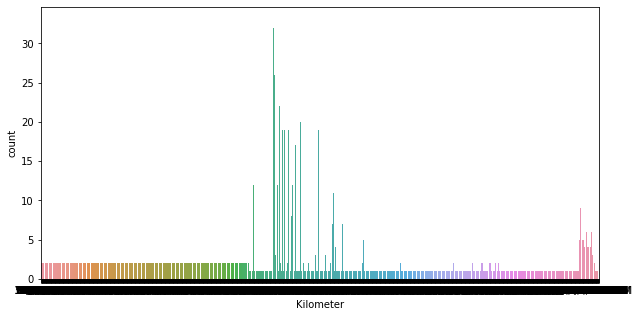

70,000 kms    33
80,000 kms    32
75,000 kms    32
60,000 kms    29
55,000 kms    28
              ..
24,907 kms     1
57,866 kms     1
55,300 kms     1
57,561 kms     1
39,438 kms     1
Name: Kilometer, Length: 2364, dtype: int64


In [10]:
#plot each class frequency
plt.figure(figsize=(20,5))
sns.countplot(x='Kilometer',data=data)
plt.show()
print(data['Kilometer'].value_counts())

From graph we can see there are maximum driven car is 70,000km

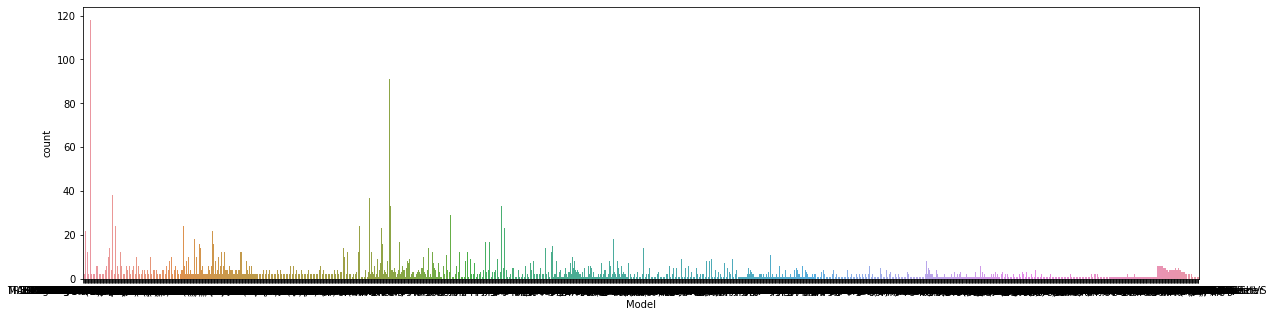

VXI Manual                      118
VXI                              91
DELTA 1.2 K12 Manual             48
LXI Manual                       46
SPORTZ 1.2 KAPPA VTVT Manual     46
                               ... 
200 Sport Edition                 1
G Plus                            1
Revotron XMS                      1
1.6 SX Option Executive           1
VXI CNG Optional                  1
Name: Model, Length: 1486, dtype: int64


In [12]:
#plot each class frequency
plt.figure(figsize=(20,5))
sns.countplot(x='Model',data=data)
plt.show()
print(data['Model'].value_counts())

We can see that the maximum no. of cars with model or variant name is VXI for the sale.

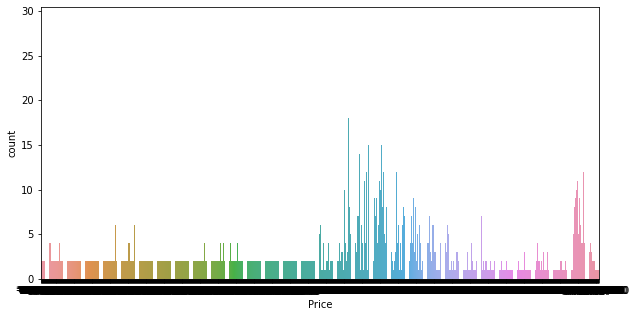

475000     29
325000     27
625000     23
645000     22
675000     21
           ..
434000      1
869000      1
430000      1
294000      1
3400000     1
Name: Price, Length: 1705, dtype: int64


In [14]:
#plot each class frequency
plt.figure(figsize=(10,5))
sns.countplot(x='Price',data=data)
plt.show()
print(data['Price'].value_counts())

From graph it is clear that the maximum cars are for the sale in price of Rs.475000.

# EDA

# Data preprocessing

In [15]:
#Converting all capital letter into small letters
for i in data:
    data[i] =data[i].str.lower()
data

,Name,Model,Fuel,Kilometer,Type,Onwer,Price
0,2013 maruti ritz,zxi manual,petrol,"14,047 km",manual,1st,"₹3,83,999"
1,2016 maruti baleno,delta 1.2 k12 manual,petrol,"11,510 km",manual,2nd,"₹5,06,399"
2,2012 honda accord,2.4 mt manual,petrol,"50,161 km",manual,2nd,"₹5,20,199"
3,2019 maruti swift,zxi amt automatic,petrol,"15,445 km",automatic,2nd,"₹6,73,399"
4,2014 maruti wagon r 1.0,lxi manual,petrol,"13,900 km",manual,1st,"₹3,38,799"
...,...,...,...,...,...,...,...
5019,hyundai i10 (2010),era,petrol,42000.0 km,manual,2nd,"₹ 2,25,000"
5020,hyundai elite i20 (2015),sportz (o) 1.2,petrol,111000.0 km,manual,2nd,"₹ 5,99,000"
5021,bmw 3 series (2012),320d luxury line,diesel,85000.0 km,automatic,2nd,"₹ 11,99,000"
5022,maruti suzuki swift dzire (2015),vdi bsiv,diesel,71000.0 km,manual,1st,"₹ 4,25,000"


Now if you look into dataset there is unstructured data e.g in price column RS is present , in Kilometer driven column km is present now lets remove this and make data into structured form

In [16]:
# Find the '--' in all the features
unkonwn={}
for i in list(data.columns):
    if (data[i]).dtype==object:
        a=np.sum(data[i]=="--")
        unkonwn[i]=a
unkonwn=pd.DataFrame.from_dict(unkonwn,orient='index')
unkonwn

,0
Name,0
Model,0
Fuel,2
Kilometer,0
Type,0
Onwer,3
Price,0


In [17]:
# lets Replace the valune to NA
for i in data:
    data[i]=data[i].replace('--',(np.NaN))

In [18]:
# Lets Check again Find the '--' in all the features
unkonwn={}
for i in list(data.columns):
    if (data[i]).dtype==object:
        a=np.sum(data[i]=="--")
        unkonwn[i]=a
unkonwn=pd.DataFrame.from_dict(unkonwn,orient='index')
unkonwn

,0
Name,0
Model,0
Fuel,0
Kilometer,0
Type,0
Onwer,0
Price,0


In [20]:
# In onwer column there are spelling misteks & duplicates are there lets deal with it 
data["Onwer"]=data["Onwer"].replace(['1st','first','0','1st owner'],1)

data["Onwer"]=data["Onwer"].replace(['2nd','2nd owner','second'],2)

data["Onwer"]=data["Onwer"].replace(['3rd','third','3rd owner'],3)

data["Onwer"]=data["Onwer"].replace(['4th','fourth'],4)
data["Onwer"]

0       1.0
1       2.0
2       2.0
3       2.0
4       1.0
       ... 
5019    2.0
5020    2.0
5021    2.0
5022    1.0
5023    2.0
Name: Onwer, Length: 5024, dtype: float64

In [21]:
# In Kilometer column km, kms & some spelling mistecks are there so lets deal with it bu using pandas str method
data["Kilometer"]=data["Kilometer"].str[:-2]

data["Kilometer"]=data["Kilometer"].str.replace(",","")

data["Kilometer"]=data["Kilometer"].str.replace('k','')

data["Kilometer"]

0          14047 
1          11510 
2          50161 
3          15445 
4          13900 
          ...    
5019     42000.0 
5020    111000.0 
5021     85000.0 
5022     71000.0 
5023     68000.0 
Name: Kilometer, Length: 5024, dtype: object

In [23]:
# Also in Model column data is mixed with type so lets deal wit it by using pandas str & replcae method
data["Model"]=data["Model"].str.replace("manual","")

data["Model"]=data["Model"].str.replace("automatic","")

data["Model"]

0                   zxi 
1         delta 1.2 k12 
2                2.4 mt 
3               zxi amt 
4                   lxi 
              ...       
5019                 era
5020      sportz (o) 1.2
5021    320d luxury line
5022            vdi bsiv
5023     vdi (abs) bs-iv
Name: Model, Length: 5024, dtype: object

In [24]:
# As above mentioned and from graph we see there are Rs str is present so lets deal with it by str menthod
data["Price"]=data["Price"].str.replace("₹","")

data["Price"]=data["Price"].str.replace(",","")

data['Price']=data['Price'].replace('',0)

As price column has null values so, lets deal with it by using mode method

In [34]:
# Dealing with null values
data['Price']=data['Price'].fillna(data['Price'].mode()[0])

In [46]:
# Lets change the type of column in dataset 
data['Price']=data['Price'].astype(int)
data['Kilometer']=data['Kilometer'].astype(float)

In [47]:
# As we see there are null present in other columns also so lets deal with it 
data=data.dropna()
data

,Name,Model,Fuel,Kilometer,Type,Onwer,Price
0,2013 maruti ritz,zxi,petrol,14047.0,manual,1.0,383999
1,2016 maruti baleno,delta 1.2 k12,petrol,11510.0,manual,2.0,506399
2,2012 honda accord,2.4 mt,petrol,50161.0,manual,2.0,520199
3,2019 maruti swift,zxi amt,petrol,15445.0,automatic,2.0,673399
4,2014 maruti wagon r 1.0,lxi,petrol,13900.0,manual,1.0,338799
...,...,...,...,...,...,...,...
5019,hyundai i10 (2010),era,petrol,42000.0,manual,2.0,225000
5020,hyundai elite i20 (2015),sportz (o) 1.2,petrol,111000.0,manual,2.0,599000
5021,bmw 3 series (2012),320d luxury line,diesel,85000.0,automatic,2.0,1199000
5022,maruti suzuki swift dzire (2015),vdi bsiv,diesel,71000.0,manual,1.0,425000


In [48]:
# Lets Check again for null values
print(data.isna().sum())

Name         0
Model        0
Fuel         0
Kilometer    0
Type         0
Onwer        0
Price        0
dtype: int64


In [49]:
# Lets check for the duplicates
data.drop_duplicates(inplace=True)

print(data.shape)

(3762, 7)


# Statistical Summary

In [50]:
# Lets understand data at high level check the stastics of dataset
data.describe(include='all')

,Name,Model,Fuel,Kilometer,Type,Onwer,Price
count,3762,3762,3762,3.762000e+03,3762,3762.000000,3.762000e+03
unique,973,1448,7,NaN,2,NaN,NaN
top,0,vxi,petrol,NaN,manual,NaN,NaN
freq,477,102,2461,NaN,2437,NaN,NaN
mean,NaN,NaN,NaN,5.067751e+04,NaN,1.070973,8.423900e+05
std,NaN,NaN,NaN,5.995798e+04,NaN,0.275784,8.919886e+05
min,NaN,NaN,NaN,1.010000e+02,NaN,1.000000,3.000000e+04
25%,NaN,NaN,NaN,2.626075e+04,NaN,1.000000,4.626242e+05
50%,NaN,NaN,NaN,4.678800e+04,NaN,1.000000,5.724495e+05
75%,NaN,NaN,NaN,6.818700e+04,NaN,1.000000,9.339248e+05


In [51]:
data.head(3)

,Name,Model,Fuel,Kilometer,Type,Onwer,Price
0,2013 maruti ritz,zxi,petrol,14047.0,manual,1.0,383999
1,2016 maruti baleno,delta 1.2 k12,petrol,11510.0,manual,2.0,506399
2,2012 honda accord,2.4 mt,petrol,50161.0,manual,2.0,520199


In [52]:
# lets seaprate the catogorical data & numirical data
numerics=['int8','int16','int32','int64','float16','float32','float64']
cat_col=[] #empty list
features=data.columns.values.tolist()
for i in features:
    if data[i].dtype in numerics:
        continue
    cat_col.append(i)
cat_col

['Name', 'Model', 'Fuel', 'Type']

In [53]:
# Lets frist covert categorical data(type & column) into int 
label = LabelEncoder()
for i in cat_col:
    df=label.fit_transform(data[i])
    pd.Series(df)
    data[i]=df

In [54]:
data.head(3)

,Name,Model,Fuel,Kilometer,Type,Onwer,Price
0,266,1420,5,14047.0,1,1.0,383999
1,456,705,5,11510.0,1,2.0,506399
2,187,404,5,50161.0,1,2.0,520199


Now, data looks great lets move further 

# Bivariate Plot

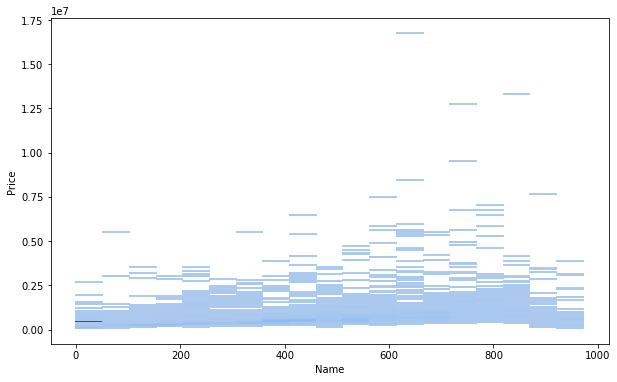

In [61]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.histplot(x ='Name', y ='Price', data = data)
plt.show()

<Figure size 720x432 with 0 Axes>

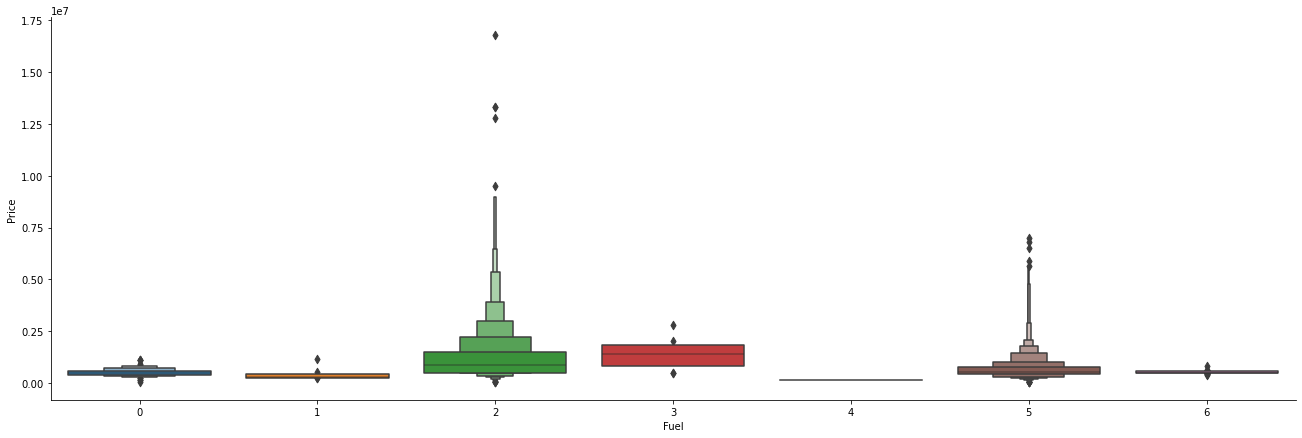

In [56]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.catplot(x ='Fuel', y ='Price', data = data, kind = "boxen", height = 6, aspect = 3)
plt.show()

From graph we can see the type 2 has the maximum peice

<Figure size 720x432 with 0 Axes>

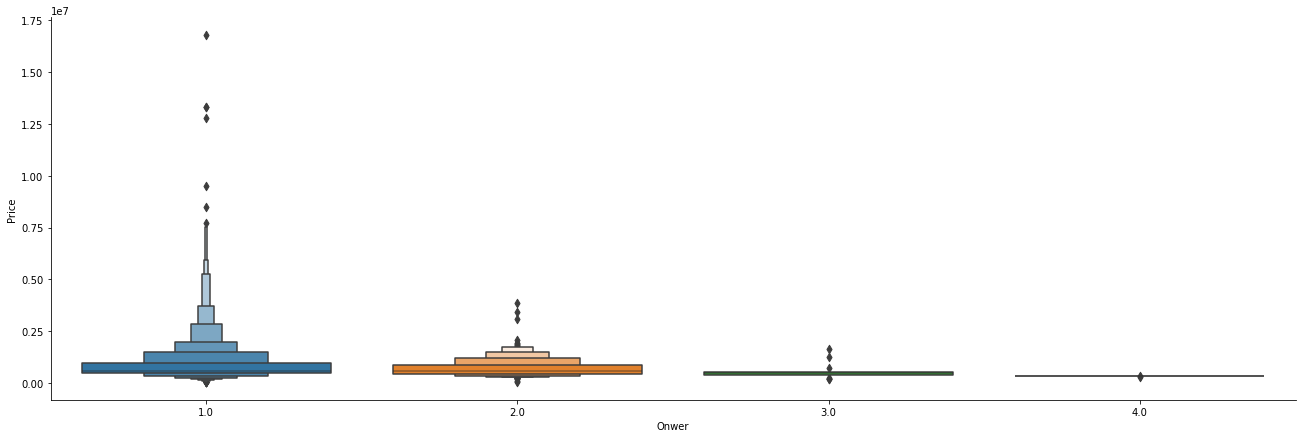

In [62]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.catplot(x ='Onwer', y ='Price', data = data, kind = "boxen", height = 6, aspect = 3)
plt.show()

From graph we can see that the 1st onwer has the maximum cars for the sale

<Figure size 720x432 with 0 Axes>

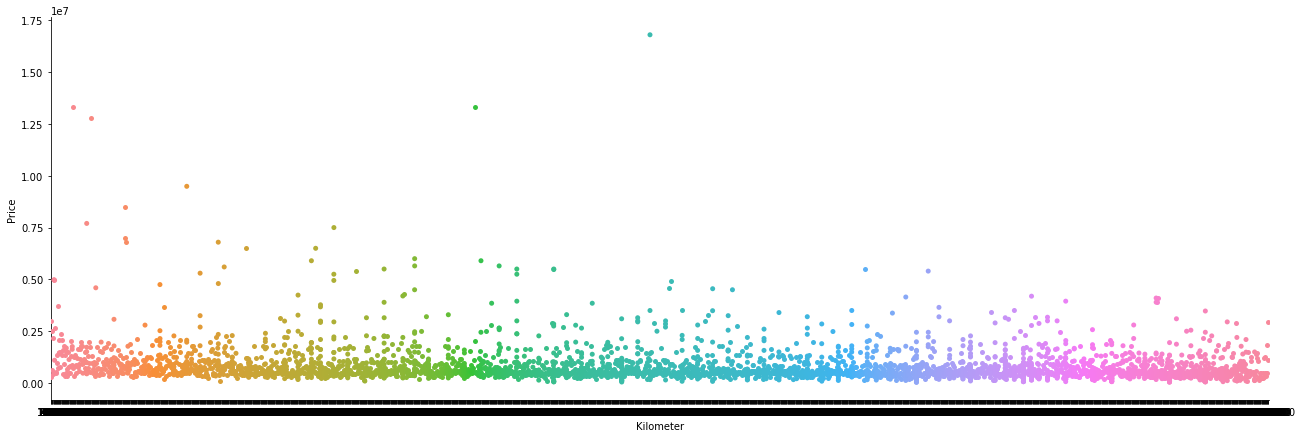

In [66]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.catplot(x ='Kilometer', y ='Price', data = data,  height = 6, aspect = 3)
plt.show()

<Figure size 720x432 with 0 Axes>

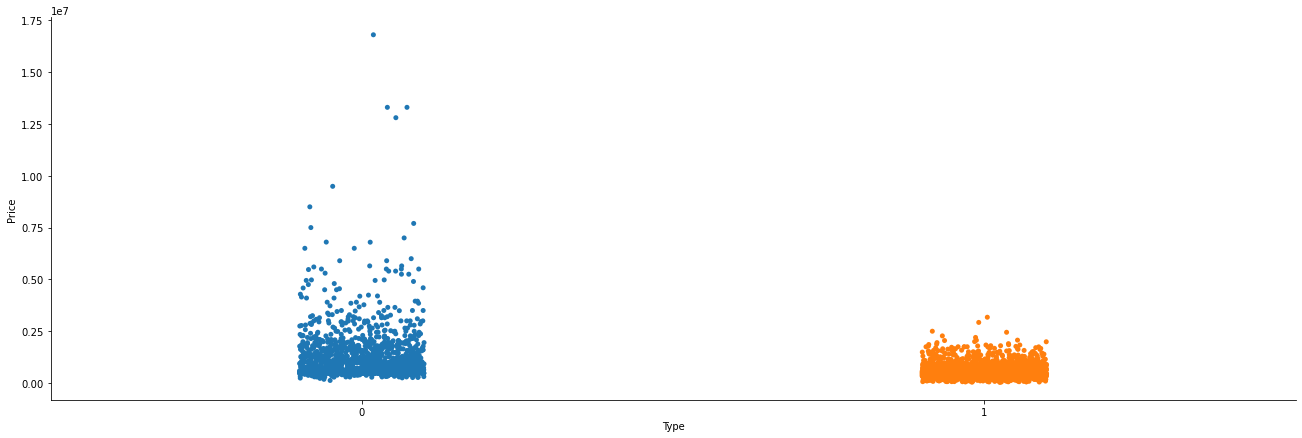

In [67]:
#Bivariant graph
plt.figure(figsize =(10, 6))
sns.catplot(x ='Type', y ='Price', data = data,  height = 6, aspect = 3)
plt.show()

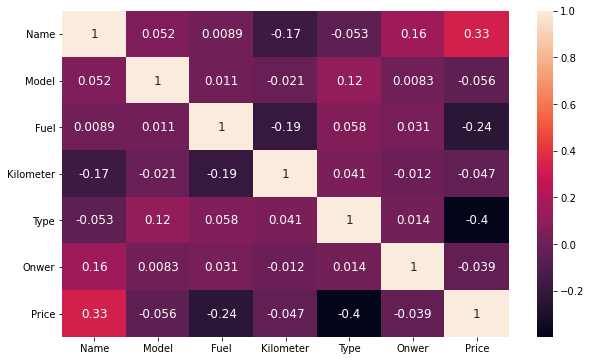

In [73]:
#check multicolinearity
plt.figure(figsize=(10,6))
sns.heatmap(data.corr(),annot=True,annot_kws={'size':12})
plt.show()

From graph we can see there is no multicolinarity in the variables

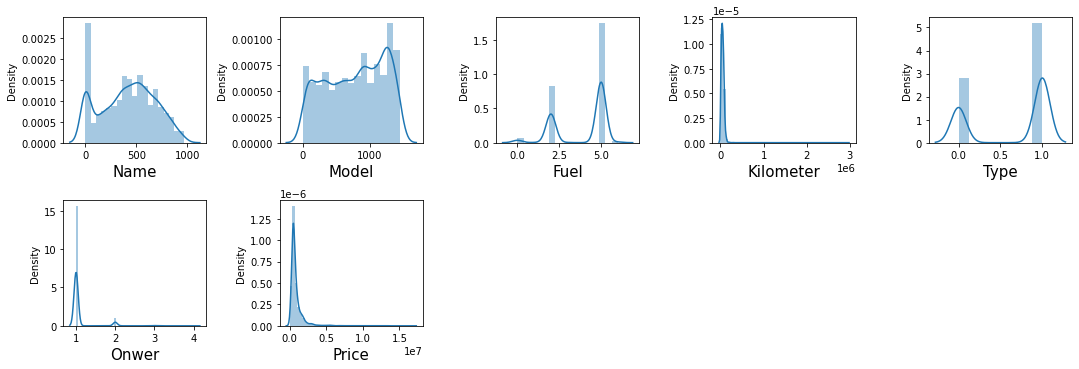

In [68]:
#Let's see the how data is distributed or Graphical analysis of all features
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=40:
        ax=plt.subplot(8,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

From graph we can see the skewness is present, so lets check with skew() method also.

In [69]:
data.skew()

Name         -0.089996
Model        -0.196369
Fuel         -0.844453
Kilometer    32.037793
Type         -0.619074
Onwer         4.194870
Price         6.139009
dtype: float64

We can see the kilometer & price independant variable has right skewness so lets deal with it by using Power transformation.

As we see the skewed data is present as per thumb rule +0.5/-0.5 weight lets work on right skewed data by using power transform

In [74]:
# Separate the skewed columns
df1=['Kilometer','Price','Onwer']
    
# Using power transformation to remove skewed data
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
data[df1]=pt.fit_transform(data[df1].values)

In [75]:
data.head(3)

,Name,Model,Fuel,Kilometer,Type,Onwer,Price
0,266,1420,5,-1.285558,1,-0.266848,-0.734277
1,456,705,5,-1.470312,1,3.748022,-0.312495
2,187,404,5,0.223916,1,3.748022,-0.272207


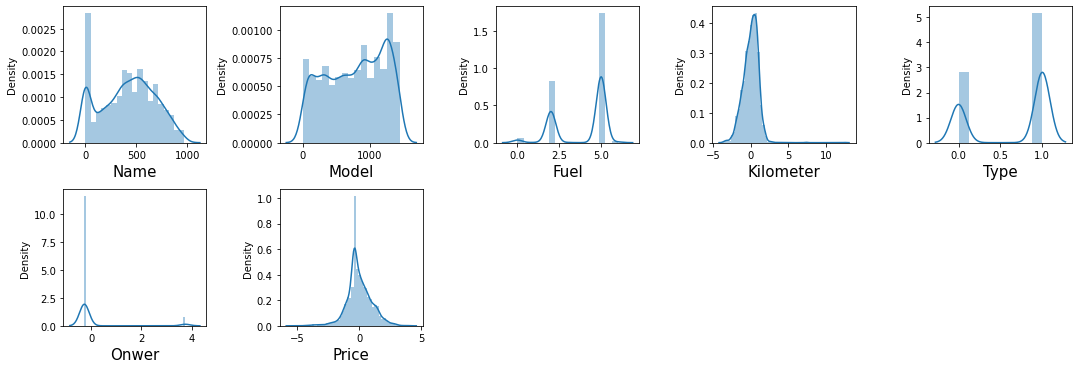

In [76]:
# Distribution or Graphical analysis after Power transformation
plt.figure(figsize=(15,20))
plotnumber=1
for column in data:
    if plotnumber<=40:
        ax=plt.subplot(8,5,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

Now data looks good lets check for the outliers

In [77]:
data.shape

(3762, 7)

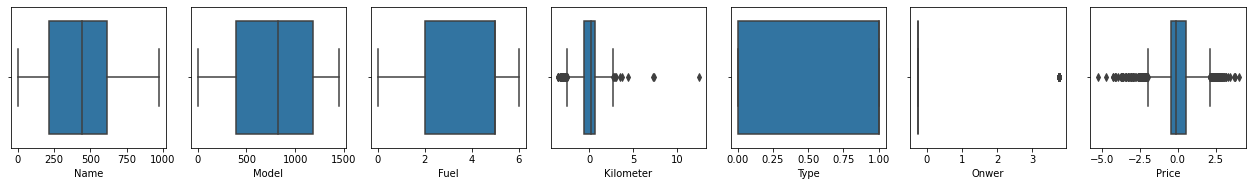

In [78]:
#Let's see the outliers in the dataset by using box plot or Graphical analysis of all features
myFig=plt.figure(figsize=(20,20))
plotnumber=1
for column in data:
    if plotnumber<=64:
        ax=plt.subplot(8,8,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.tight_layout()

From graph we can see the outliers are present columns so lets deal with it by using Zscore

In [79]:
# Separate the outliers columns
df1=['Kilometer','Price']

In [80]:
# from above graph we see there is outliers in featurs Let's remove outliers from above columns by using Zscore
z_score=zscore(data[df1])
abs_z_score=np.abs(z_score)
filtering_entry=(abs_z_score<3).all(axis=1)
data=data[filtering_entry]

In [82]:
# Check shape again
print(data.shape)

(3693, 7)


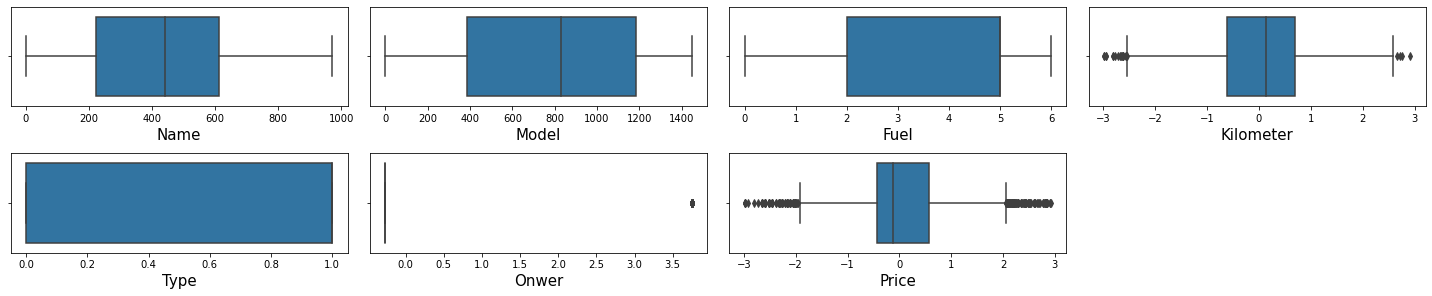

In [83]:
#Let's see plot after removing outliers
myFig=plt.figure(figsize=(20,20))
plotnumber=1
for column in data:
    if plotnumber<=40:
        ax=plt.subplot(10,4,plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize=15)
    plotnumber+=1
plt.tight_layout()

Now, data looks good and outliers are treated well.

In [84]:
# Let's Seperate the data & visulize the relation between featurs & lable
x=data.drop(columns=['Price'])
y=data['Price']

In [85]:
# data stadardization
scale=StandardScaler()
x_scaled=scale.fit_transform(x)

In [89]:
#check multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["vif"]=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif["featurs"]=x.columns
print(vif)

        vif    featurs
0  1.231508       Name
1  1.022937      Model
2  1.154433       Fuel
3  1.378607  Kilometer
4  1.038745       Type
5  1.029229      Onwer


No colinarity in the variables

In [90]:
print(x.shape)
print(y.shape)

(3693, 6)
(3693,)


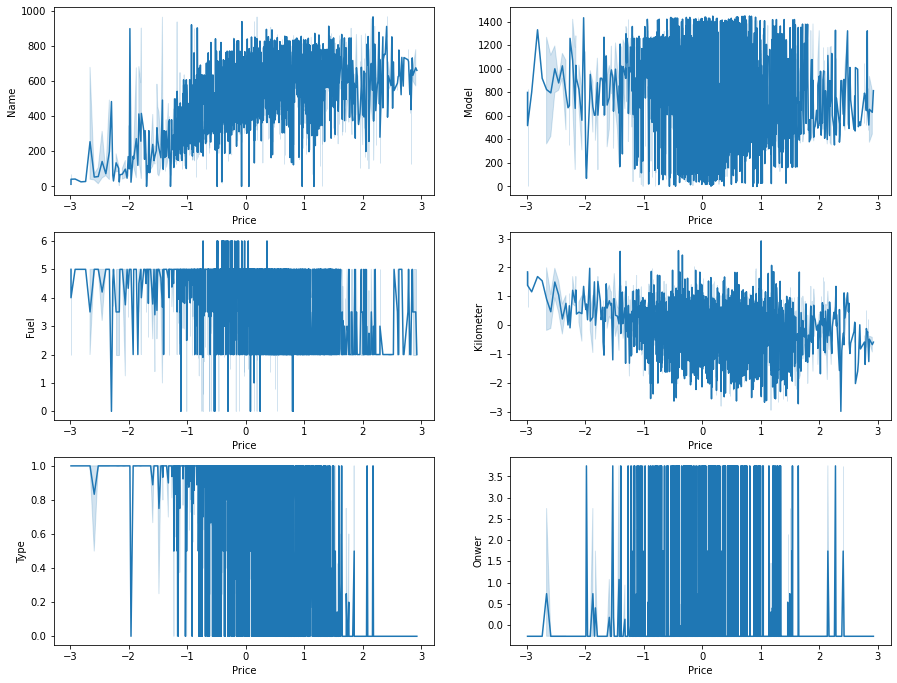

In [91]:
# see how featurs r related to lable(Graphical Analysis)
plt.figure(figsize=(15,20))
plotnumber=1
for column in x:
    if plotnumber<=10:
        ax=plt.subplot(5,2,plotnumber)
        sns.lineplot(y,x[column])
    plotnumber+=1
plt.show()

In [92]:
# Lets select the proper random state to build best model by using LinearRegression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_train)
    pred=lr.predict(x_test)
    print(f"at random sate {i}, the training accuracy is:- {r2_score(y_train,y_pred)}")
    print(f"at random sate {i}, the testing accuracy is:- {r2_score(y_test,pred)}")
    print("\n")

at random sate 0, the training accuracy is:- 0.5337469405112933
at random sate 0, the testing accuracy is:- 0.4761084302621599


at random sate 1, the training accuracy is:- 0.5143110785437424
at random sate 1, the testing accuracy is:- 0.5257324063300897


at random sate 2, the training accuracy is:- 0.5129806389480471
at random sate 2, the testing accuracy is:- 0.528162314640936


at random sate 3, the training accuracy is:- 0.5110423667103557
at random sate 3, the testing accuracy is:- 0.531309208888704


at random sate 4, the training accuracy is:- 0.5166525910594462
at random sate 4, the testing accuracy is:- 0.5197267306863323


at random sate 5, the training accuracy is:- 0.5025661186760755
at random sate 5, the testing accuracy is:- 0.5521374035699913


at random sate 6, the training accuracy is:- 0.5169182872958589
at random sate 6, the testing accuracy is:- 0.516356941779769


at random sate 7, the training accuracy is:- 0.5238197819262091
at random sate 7, the testing accura

at 92, random state the score is almost similar so i am selecting the 92 random state to build the best models

In [93]:
#Lets Split data  again into train & test by using this random state
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=92)

In [94]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2585, 6)
(2585,)
(1108, 6)
(1108,)


# Lets Build the model for prediction of Price

In [95]:
def print_score(model,x_train,x_test,y_train,y_test,train=True):
    if train:
        y_pred=model.predict(x_train)
        print("Train Report:",r2_score(y_train,y_pred))
    elif train==False:
        pred=model.predict(x_test)
        print("Test Report:",r2_score(y_test,pred))
        print("RMSE:",np.sqrt(mean_squared_error(y_test,pred)))
        print("MAE:",mean_absolute_error(y_test,pred))
        print("MSE:",mean_squared_error(y_test,pred))

# Model Evaluation

In [96]:
#Below is a function to find the accuracy of each model on the basis of K-fold cross validation.

from sklearn.model_selection import cross_val_score
def model_accuracy(model,X_train=x_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv =5)
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [97]:
# Model no.1
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

print_score(lr,x_train,x_test,y_train,y_test,train=True)
print_score(lr,x_train,x_test,y_train,y_test,train=False)
model_accuracy(lr)

Train Report: 0.5193460077049958
Test Report: 0.5114747301319231
RMSE: 0.6452877894108415
MAE: 0.4997817703646926
MSE: 0.41639633116273056
Accuracy: 51.54 %
Standard Deviation: 2.34 %


In [98]:
# Model no.2
from sklearn.linear_model import LinearRegression, Lasso, LassoCV

lcv=LassoCV(alphas=None,max_iter=10000,normalize=True)
lcv.fit(x_train,y_train)
alpha=lcv.alpha_
print(alpha)
Lasso_reg=Lasso(alpha).fit(x_train,y_train)

print_score(Lasso_reg,x_train,x_test,y_train,y_test,train=True)
print_score(Lasso_reg,x_train,x_test,y_train,y_test,train=False)
model_accuracy(Lasso_reg)

8.884455708620262e-06
Train Report: 0.519346007131841
Test Report: 0.5114751053286833
RMSE: 0.6452875416141057
MAE: 0.49977972080273936
MSE: 0.4163960113623762
Accuracy: 51.54 %
Standard Deviation: 2.34 %


In [99]:
# Model no.3
from sklearn.ensemble import RandomForestRegressor

rand_regressor= RandomForestRegressor()
rand_regressor.fit(x_train,y_train)

print_score(rand_regressor,x_train,x_test,y_train,y_test,train=True)
print_score(rand_regressor,x_train,x_test,y_train,y_test,train=False)
model_accuracy(rand_regressor)

Train Report: 0.9711304747734515
Test Report: 0.8253203112040499
RMSE: 0.385861221919339
MAE: 0.2511521516034769
MSE: 0.1488888825810854
Accuracy: 77.49 %
Standard Deviation: 3.71 %


In [100]:
# Model no.3
from xgboost import XGBRegressor

xgb=XGBRegressor()
xgb.fit(x_train,y_train)

print_score(xgb,x_train,x_test,y_train,y_test,train=True)
print_score(xgb,x_train,x_test,y_train,y_test,train=False)
model_accuracy(xgb)

Train Report: 0.9784533583199685
Test Report: 0.819835071320794
RMSE: 0.3918727436318222
MAE: 0.26216878094627505
MSE: 0.15356424720153183
Accuracy: 79.55 %
Standard Deviation: 3.26 %


In [101]:
#Model no.4
from sklearn.ensemble import HistGradientBoostingRegressor

gbdt=HistGradientBoostingRegressor()

gbdt.fit(x_train,y_train)

print_score(gbdt,x_train,x_test,y_train,y_test,train=True)
print_score(gbdt,x_train,x_test,y_train,y_test,train=False)
model_accuracy(gbdt)

Train Report: 0.8996621377069951
Test Report: 0.8130204258574354
RMSE: 0.39921514952939363
MAE: 0.2781181290296519
MSE: 0.15937273561377613
Accuracy: 78.61 %
Standard Deviation: 3.62 %


In [102]:
#Model no.5
from sklearn.tree import DecisionTreeRegressor

dt=DecisionTreeRegressor()

dt.fit(x_train,y_train)

print_score(dt,x_train,x_test,y_train,y_test,train=True)
print_score(dt,x_train,x_test,y_train,y_test,train=False)
model_accuracy(dt)

Train Report: 0.9999545796434472
Test Report: 0.6601058719637307
RMSE: 0.5382471778757553
MAE: 0.3236724154000528
MSE: 0.2897100244912149
Accuracy: 62.60 %
Standard Deviation: 5.12 %


# Looking at accuracy i m selecting Lasso regression with Kfold cross validation method

In [131]:
#save model
import pickle
Filename='Finalized_model_Sales_price.pickle'
pickle.dump(Lasso_reg,open(Filename,'wb'))